In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


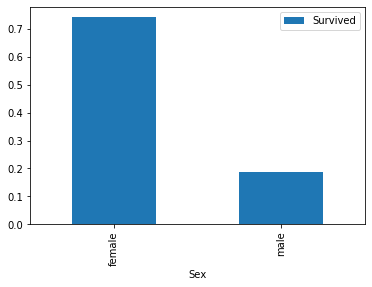

In [6]:
#to show how many sex affected the survival
sex_pivot=train.pivot_table(index='Sex',values='Survived')
sex_pivot.plot.bar()

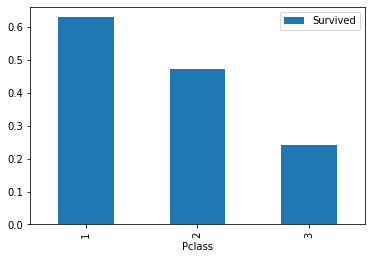

In [7]:
#to show how many pclass affected the survival
class_pivot=train.pivot_table(index='Pclass', values='Survived')
class_pivot.plot.bar()

In [8]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

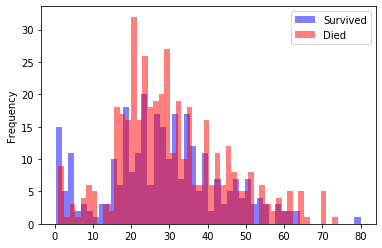

In [11]:
survived=train[train['Survived']==1]
died=train[train['Survived']==0]
survived['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
died['Age'].plot.hist(alpha=0.5, color='red',bins=50)
plt.legend(['Survived','Died'])
plt.show()

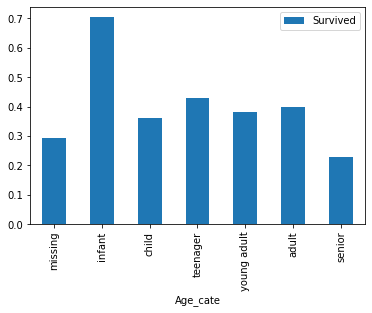

In [12]:
#funcion to transform age into a categorial feature
def process_age(df, cut_points,label_names):
    df['Age']=df['Age'].fillna(-0.5)
    df['Age_cate']=pd.cut(df['Age'],cut_points,labels=label_names)
    return df

#to show how age is affecting the survival class.
cut_points=[-1, 0,5,12,18,35,60,100]
label_names=['missing', 'infant', 'child','teenager', 'young adult','adult','senior']
train=process_age(train, cut_points,label_names)
test=process_age(test, cut_points,label_names)

pivot=train.pivot_table(index='Age_cate', values='Survived')
pivot.plot.bar()

In [13]:
def create_dummies(df, column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies], axis=1)
    return df

for column in['Pclass', 'Sex', 'Age_cate']:
    train=create_dummies(train, column)
    test=create_dummies(test, column)

In [19]:
holdout=test
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr=LogisticRegression()
columns=['Pclass_1', 'Pclass_2', 'Pclass_3','Sex_female','Sex_male','Age_cate_missing','Age_cate_infant','Age_cate_child','Age_cate_teenager','Age_cate_young adult','Age_cate_adult','Age_cate_senior']
X=train[columns]
y=train['Survived']
train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.20,random_state=0)

In [20]:
lr.fit(train_X, train_y)
predictions=lr.predict(test_X)

C:\Users\temitayo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_y,predictions)
print(accuracy)

0.8100558659217877


In [22]:
hold_pre=lr.predict(holdout[columns])

In [23]:
hold_ids=holdout['PassengerId']
submission_df={'passengerId':hold_ids,'Survived':hold_pre}
submission=pd.DataFrame(submission_df)

In [24]:
submission

,passengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [25]:
submission.to_csv('submission.csv', index=False)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X,train_y)
    y_pred=knn.predict(test_X)
    scores.append(accuracy_score(test_y,y_pred))

In [43]:
scores

[0.8100558659217877,
 0.8156424581005587,
 0.8100558659217877,
 0.8100558659217877,
 0.8100558659217877,
 0.8156424581005587,
 0.8156424581005587,
 0.8156424581005587,
 0.8268156424581006,
 0.8100558659217877,
 0.8100558659217877,
 0.8100558659217877,
 0.8212290502793296,
 0.8100558659217877,
 0.8156424581005587]

In [58]:
scores.index(max(scores))

2

In [59]:
hold_pre2=knn.predict(holdout[columns])

In [62]:
hold_ids=holdout['PassengerId']
submission_df2={'passengerId':hold_ids,'Survived':hold_pre2}
submission2=pd.DataFrame(submission_df)

In [63]:
submission2

,passengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
